In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35/hard_hat_workers99.txt
/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35/hard_hat_workers65.txt
/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35/hard_hat_workers95.txt
/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35/hard_hat_workers1.txt
/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35/hard_hat_workers105.txt
/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35/hard_hat_workers18.txt
/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35/hard_hat_workers79.txt
/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35/hard_hat_workers24.png
/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35/hard_hat_workers66.png
/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35/hard_hat_workers21.png
/kaggle/input/annota

In [3]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [4]:
try:
    shutil.rmtree("/kaggle/working/dataset")
    shutil.rmtree("/kaggle/working/yolov5")
except:
    pass

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15937, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15937 (delta 27), reused 40 (delta 20), pack-reused 15880
Receiving objects: 100% (15937/15937), 14.66 MiB | 17.18 MiB/s, done.
Resolving deltas: 100% (10926/10926), done.


In [6]:
%cd yolov5/

/kaggle/working/yolov5


In [7]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.8/613.8 kB 24.3 MB/s eta 0:00:00


In [8]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/kaggle/working/dataset/images/train"
val_path = "/kaggle/working/dataset/images/val"
crs_path = "/kaggle/input/annotation-helmet/labels_my-project-name_2023-09-02-11-50-35"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  84
validation images are :  21


In [9]:
len(imgs)

106

In [10]:
train_image_path = "/kaggle/working/dataset/images/train"
train_label_path = "/kaggle/working/dataset/labels/train"
val_image_path = "/kaggle/working/dataset/images/val"
val_label_path = "/kaggle/working/dataset/labels/val"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)
    
# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  1
['hard_hat_workers42.png'] ['hard_hat_workers42.txt']


In [11]:
yaml_dict = {"train" : "/kaggle/working/dataset/images/train",
             "val" : "/kaggle/working/dataset/images/val",
             "nc" : 2,
             "names" : ['Helmet', 'Head']
}
import yaml
with open(r'/kaggle/working/yolov5/my_data.yaml', 'w') as file:
    documents = yaml.dump(yaml_dict, file)

In [12]:
with open(r'/kaggle/working/yolov5/my_data.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['names:\n', '- Helmet\n', '- Head\n', 'nc: 2\n', 'train: /kaggle/working/dataset/images/train\n', 'val: /kaggle/working/dataset/images/val\n']


In [13]:
!wandb disabled
!python train.py --img 415 --batch 10 --epochs 30 --data /kaggle/working/yolov5/my_data.yaml --weights yolov5s.pt --cache --workers 2

W&B disabled.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/yolov5/my_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=10, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-213-g378ed74 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, wei

In [18]:
!python detect.py --source /kaggle/working/dataset/images/val/hard_hat_workers16.png --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/working/dataset/images/val/hard_hat_workers16.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-213-g378ed74 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/working/dataset/images/val/hard_hat_workers16.png: 640x640 8 Helmets, 6.1ms
Speed: 0.5ms pre-process, 6.1ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


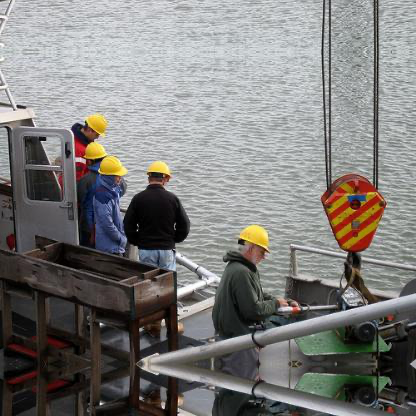

In [19]:
Image(filename='/kaggle/working/dataset/images/val/hard_hat_workers16.png', width=416)

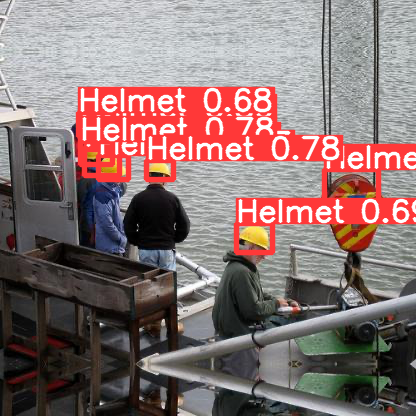

In [21]:
Image(filename='runs/detect/exp3/hard_hat_workers16.png', width=1000)